<a href="https://colab.research.google.com/github/tumonis/mba-deeplearning-iad-006-2024-public/blob/main/LT2_ML2_Trabalho1_20240820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Carregar o conjunto de dados MNIST e pré-processar os dados, se necessário.


In [1]:
# prompt: Carregar o conjunto de dados MNIST e pré-processar os dados, se necessário.

from keras.datasets import mnist

# Carrega os dados MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()




2. Selecionar a biblioteca ou framework que você irá utilizar (por exemplo, Scikit-learn e/ou XGBoost).

In [2]:
# prompt: Selecionar Scikit-learn decisiontree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # importa randomforest
import xgboost as xgb # importa xgboost


In [3]:
# prompt: treinar decision tree

# Achatando as imagens para um vetor unidimensional
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Criando o classificador Decision Tree
cdt = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)

# Treinando o classificador
cdt.fit(x_train, y_train)

y_pred = cdt.predict(x_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", cdt.score(x_test, y_test))

Precisão: 0.6747


In [4]:
# prompt: treinar random forest

# Criando o classificador Random Forest
crf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Treinando o classificador
crf.fit(x_train, y_train)

# Fazendo previsões
y_pred = crf.predict(x_test)

# Imprimir a precisão da Random Forest
print("Precisão:", crf.score(x_test, y_test))



Precisão: 0.947


In [8]:
# prompt: treinar XGBoost

# Criando o classificador XGBoost
cxgb = cxgb = xgb.XGBClassifier(
    n_estimators=50,               # Reduzindo o número de árvores
    max_depth=6,                   # Reduzindo a profundidade máxima
    learning_rate=0.1,             # Taxa de aprendizado permanece a mesma
    subsample=0.8,                 # Usando apenas 80% dos dados em cada árvore
    colsample_bytree=0.8,          # Usando apenas 80% das características em cada árvore
    tree_method='hist',            # Usando o método de histograma para treinar mais rápido
    eval_metric='logloss',         # Métrica de avaliação
)

# Treinando o classificador
cxgb.fit(x_train, y_train)

# Fazendo previsões
y_pred = cxgb.predict(x_test)

# Imprimir a precisão do XGBoost
print("Precisão:", cxgb.score(x_test, y_test))


Precisão: 0.9586


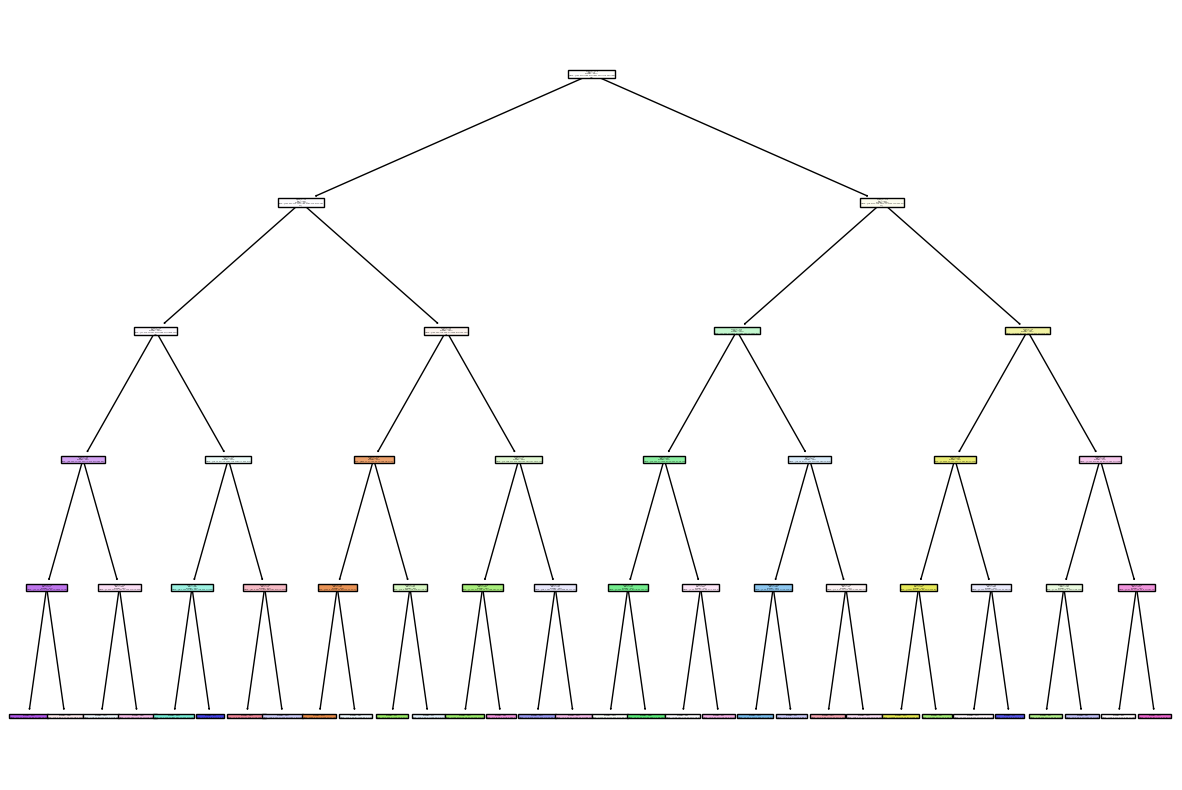

In [9]:
# prompt: Visualizar a árvore de decisão treinada no exercício anterior, utilizando ferramentas como o Scikit-learn

import matplotlib.pyplot as plt
from sklearn import tree

# Visualizando a árvore de decisão
plt.figure(figsize=(15, 10))
tree.plot_tree(cdt, filled=True)
plt.show()


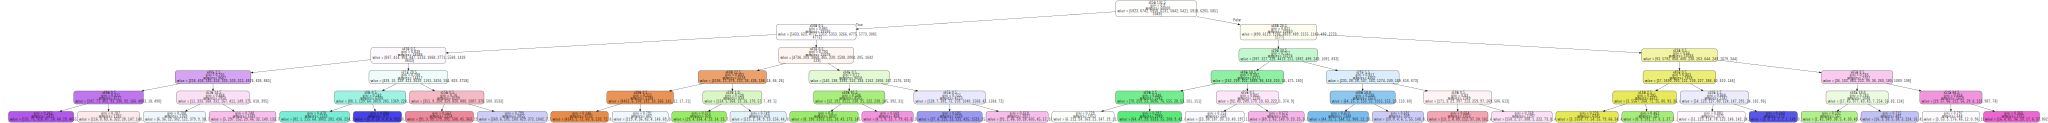

In [10]:
# prompt: Visualizar a árvore de decisão treinada no exercício anterior, utilizando o Graphviz.

import graphviz
from sklearn import tree

# Exporta a árvore de decisão para um arquivo .dot
dot_data = tree.export_graphviz(cdt, out_file=None,
                         filled=True, rounded=True,
                         special_characters=True)

# Cria o gráfico a partir do arquivo .dot
graph = graphviz.Source(dot_data)

# Renderiza o gráfico como um arquivo PDF (ou outro formato de sua preferência)
graph.render("decision_tree")

# Exibe o gráfico no Colab
graph


In [12]:
# prompt: Calcular a medida de impureza para diferentes conjuntos de dados e entender como ela impacta o desempenho do modelo.
import numpy as np

from sklearn import tree
from sklearn.metrics import accuracy_score

# Função para calcular a impureza de Gini
def gini_impurity(y):
  unique, counts = np.unique(y, return_counts=True)
  probabilities = counts / len(y)
  gini = 1 - np.sum(probabilities**2)
  return gini

# Função para calcular a entropia
def entropy(y):
  unique, counts = np.unique(y, return_counts=True)
  probabilities = counts / len(y)
  entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10)) # Adicionando um pequeno valor para evitar log(0)
  return entropy

# Criando conjuntos de dados de exemplo com diferentes níveis de impureza
# Conjunto 1: Alta impureza
y1 = np.array([0, 1, 0, 1, 0, 1])
# Conjunto 2: Média impureza
y2 = np.array([0, 0, 0, 1, 1, 1])
# Conjunto 3: Baixa impureza
y3 = np.array([0, 0, 0, 0, 0, 1])

# Calculando a impureza de Gini e a entropia para cada conjunto
print("Conjunto 1 - Gini:", gini_impurity(y1))
print("Conjunto 1 - Entropia:", entropy(y1))
print("Conjunto 2 - Gini:", gini_impurity(y2))
print("Conjunto 2 - Entropia:", entropy(y2))
print("Conjunto 3 - Gini:", gini_impurity(y3))
print("Conjunto 3 - Entropia:", entropy(y3))

# Treinando e avaliando um modelo de árvore de decisão em cada conjunto de dados
for i, y in enumerate([y1, y2, y3]):
  X = np.arange(len(y)).reshape(-1, 1) # Criando features simples
  clf = DecisionTreeClassifier()
  clf.fit(X, y)
  y_pred = clf.predict(X)
  accuracy = accuracy_score(y, y_pred)
  print(f"Conjunto {i+1} - Acurácia do modelo:", accuracy)

# Impacto da impureza no desempenho do modelo:
# Geralmente, conjuntos de dados com alta impureza exigem árvores de decisão mais complexas
# (mais nós e níveis) para alcançar boa acurácia. Isso pode levar a overfitting.
# Conjuntos de dados com baixa impureza podem ser modelados com árvores mais simples,
# reduzindo o risco de overfitting.


Conjunto 1 - Gini: 0.5
Conjunto 1 - Entropia: 0.9999999997114609
Conjunto 2 - Gini: 0.5
Conjunto 2 - Entropia: 0.9999999997114609
Conjunto 3 - Gini: 0.2777777777777777
Conjunto 3 - Entropia: 0.6500224213598151
Conjunto 1 - Acurácia do modelo: 1.0
Conjunto 2 - Acurácia do modelo: 1.0
Conjunto 3 - Acurácia do modelo: 1.0
